### Fathia Nuq Qamarina
### 2009106012
### KB A1 20
### Posttest 3

#### Import Package & Read Data

In [108]:
import pandas as pd
import numpy as n
import matplotlib.pyplot as plt
import seaborn as sns




Dataset yang tersaji adalah dataset yang memprediksi keadaan karyawan dimasa depan atau masa sekarang, apakah keluar dari perusahaan atau tidak dalam 2 tahun ke depan.

In [109]:
df = pd.read_csv("Employee.csv")


In [110]:
df.shape

(4653, 9)




Dataset terdiri dari 4653 record dan 9 column


In [111]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


Dari tabel data yang tersaji, terdapat 9 kolom yaitu :
- Education merupakan pendidikan karyawan;
- JoiningYear merupakan tahun masuk karyawan;
- City merupakan lokasi karyawan berasal;
- PaymentTier merupakan skala pembayaran karyawan.
- Age merupakan usia karyawan;
- Gender merupakan Jenis Kelamin karyawan;
- EverBenched merupakan kolom yang menjelaskan apakah karyawan pernah tidak mengerjakan proyek apapun atau pernah keluar proyek, berisi ya atau tidak;
- ExperienceInCurrentDomain merupakan kolom berapa banyak pengalaman karyawan pada domain saat ini;
- LeaveOrNot merupakan kolom apakah karyawan akan meninggalkan perusahaan dalam 2 tahun kedepan.


#### Merubah tipe data agar mudah dimengerti


In [112]:
df_copy = df.copy(deep=True)
df_copy['PaymentTier'].replace([1,2,3],['Bayaran Tinggi','Bayaran Menengah','Bayaran Rendah'],inplace=True)
df_copy['LeaveOrNot'].replace([0,1],['No','Yes'],inplace=True)
df_copy['Gender'].replace(['Male','Female'],['Laki-laki','Perempuan'],inplace=True)
df_copy.head()


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,Bayaran Rendah,34,Laki-laki,No,0,No
1,Bachelors,2013,Pune,Bayaran Tinggi,28,Perempuan,No,3,Yes
2,Bachelors,2014,New Delhi,Bayaran Rendah,38,Perempuan,No,2,No
3,Masters,2016,Bangalore,Bayaran Rendah,27,Laki-laki,No,5,Yes
4,Masters,2017,Pune,Bayaran Rendah,24,Laki-laki,Yes,2,Yes


In [113]:
df_copy.to_csv('Employee_data.csv', index=False)

# Visualisasi Data

### Mengetahui Rasio dari Keragaman Pendidikan Karyawan di Perusahaan
- Grafik Pie Chart

In [114]:
Pendidikan = df_copy['Education'].value_counts().rename_axis('pendidikan').reset_index(name='Jumlah')
Pendidikan


,pendidikan,Jumlah
0,Bachelors,3601
1,Masters,873
2,PHD,179


In [115]:
Pendidikan.pendidikan


0    Bachelors
1      Masters
2          PHD
Name: pendidikan, dtype: object

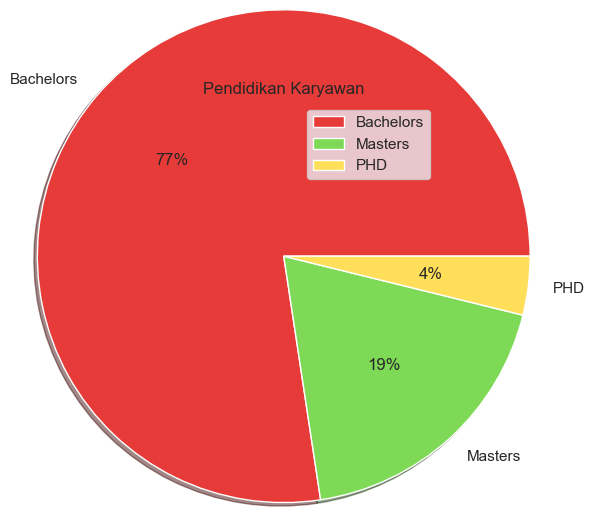

In [116]:
plt.figure(figsize=(6,4))
ax = plt.subplot()
colors=["#E73B3A","#7ED957","#FFDE59"]
plt.pie(Pendidikan.Jumlah,labels = Pendidikan.pendidikan,shadow = True , autopct ='%.0f%%',colors=colors,radius=2)
plt.title("Pendidikan Karyawan")
plt.legend(Pendidikan.pendidikan)
plt.show()


##### Dari grafik pie di atas dapat terlihat pendidikan Karyawan di Perusahaan kebanyakan Bachelors dengan 77%, selanjutnya Masters 19% lalu PHD 4%

In [117]:
Pendidikan.to_csv('Pendidikan_Karyawan.csv',index=False)

### Mengetahui Jumlah antara karyawan Laki-laki dan Perempuan
- Grafik Batang

In [118]:
Gender = df_copy['Gender'].value_counts().rename_axis('Gender').reset_index(name='Jumlah')
Gender

,Gender,Jumlah
0,Laki-laki,2778
1,Perempuan,1875


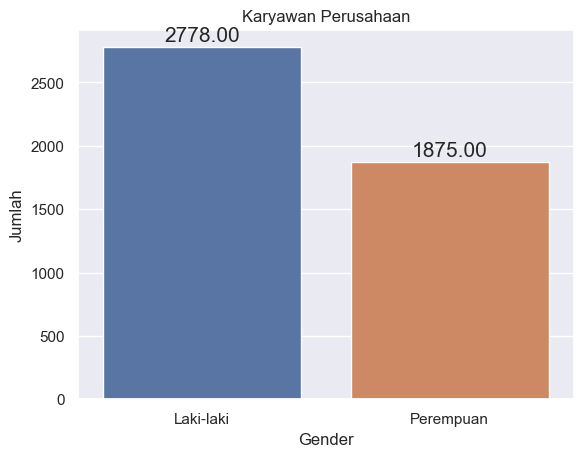

In [119]:
pr=sum(df_copy["Gender"]=="Female")
lk=sum(df_copy["Gender"]=="Male")
jml_lk=pr/df_copy.Gender.value_counts()
jml_pr=lk/df_copy.Gender.value_counts()


sns.set_theme(style="darkgrid")
histo = sns.countplot(x="Gender", data=df_copy)
ax = plt.subplot()
plt.title("Karyawan Perusahaan")
ax.set_xlabel("Gender")
ax.set_ylabel("Jumlah")


for bar in histo.patches:
   
    histo.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

##### Pada Grafik Batang Di atas, dapat terlihat karyawan pada Perusahaan Lebih banyak Laki-laki dengan jumlah 2778 karyawan. Sedangkan Perempuan 1875 karyawan.

In [120]:

Gender.to_csv('Gender_Karyawan.csv',index=False)

### Mengetahui Rasio Karyawan yang meninggalkan Perusahaan Berdasarkan Gender
- Grafik Pie Chart


In [121]:
Keluar = df_copy[df_copy["LeaveOrNot"] == 'Yes']

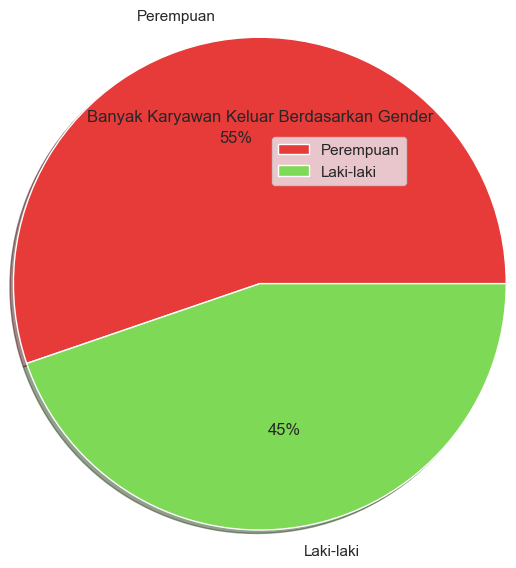

In [122]:
Keluar_Gender = Keluar.Gender.value_counts()
plt.figure(figsize=(6,4))
ax = plt.subplot()
colors=["#E73B3A","#7ED957"]
ax.pie(Keluar_Gender.values,labels = Keluar_Gender.index,shadow = True , autopct ='%.0f%%',colors=colors,radius=2)
plt.title("Banyak Karyawan Keluar Berdasarkan Gender")
plt.legend(Keluar_Gender.index)
plt.show()


In [123]:
Keluar_Gender

Perempuan    884
Laki-laki    716
Name: Gender, dtype: int64

##### Dari grafik pie di atas dapat terlihat Karyawan yang meninggalkan perusahaan 2 tahun Kedepan kebanyakan perempuan dengan nilai 55%, dengan jumlah karyawan yang keluar 884 karyawan, kemungkinan dikarenakan keterbatasan perempuan terhadapat pekerjaan yang mereka lakukan, pekerjaan yang sulit atau kewajiban keluarga

In [124]:
Keluar_Gender.to_csv('Karyawan_Keluar_Berdasarkan_Gender.csv',index=True)

### Mengetahui Korelasi Antar data
- Grafik Heatmap

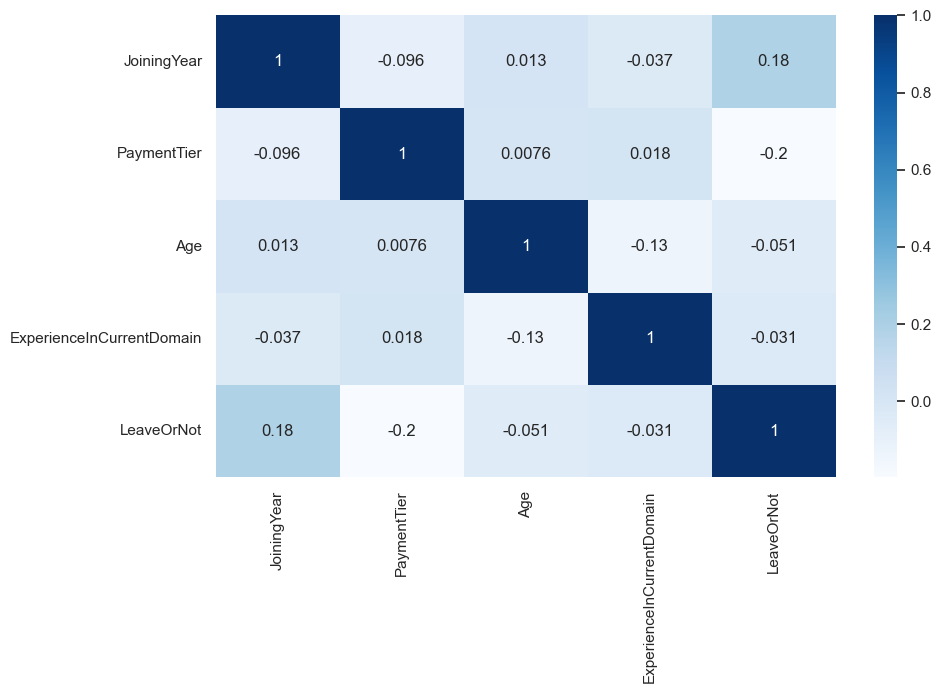

In [125]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot= True,cmap = 'Blues')
plt.show()

##### Dari Heatmap di atas, Payment Tier(Tingkat Pembayaran), dan Joining Year(Tahun Bergabung) adalah faktor yang berpengaruh apakah karyawan meninggalkan perusahaan atau tidak.

### Mengetahui Banyak Karyawan yang Keluar berdasarkan PaymentTier dan Joining Year
- Grafik Batang

Text(0, 0.5, 'Jumlah')

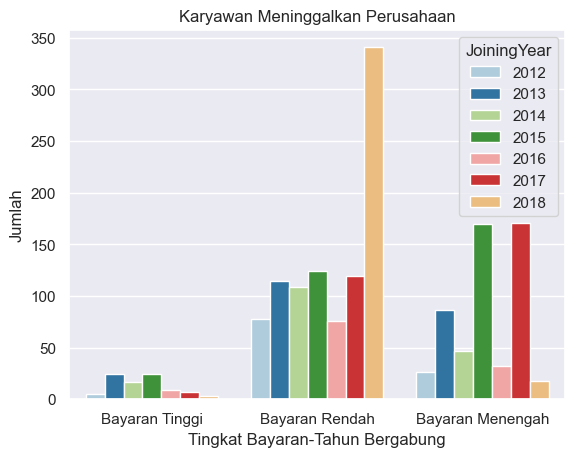

In [126]:
Karyawan_Keluar = sns.countplot(data = Keluar, x= Keluar['PaymentTier'],hue = Keluar["JoiningYear"],palette="Paired")
ax = plt.subplot()
plt.title("Karyawan Meninggalkan Perusahaan")
ax.set_xlabel("Tingkat Bayaran-Tahun Bergabung")
ax.set_ylabel("Jumlah")


##### Dari Grafik batang di atas,karyawan yang meninggalkan perusahaan lebih banyak yang tingkat bayarannya rendah dan tahun bergabungnya pada tahun 2018, kemungkinan karyawan baru tidak merasa puas dengan posisi mereka bekerja

### Mengetahui Jumlah karyawan berdasarkan Lokasi Berkerja
- Grafik Batang

In [127]:
Lokasi = df_copy['City'].value_counts().rename_axis('Kota').reset_index(name='Jumlah')
Lokasi


,Kota,Jumlah
0,Bangalore,2228
1,Pune,1268
2,New Delhi,1157


Text(-0.18055555555555536, 0.5, 'Jumlah')

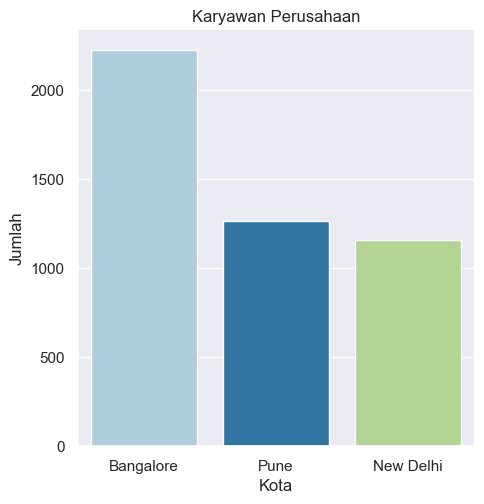

In [128]:
sns.catplot(data= df_copy,kind="count",x='City', palette = "Paired")
ax = plt.subplot()
plt.title("Karyawan Perusahaan")
ax.set_xlabel("Kota")
ax.set_ylabel("Jumlah")

##### Dari grafik batang di atas, dapat dilihat Bangalore adalah kota terbanyak tempat karyawan bekerja, kemungkinan dikarenakan lokasi perusahaan yang juga terdapat di kota tersebut, sehingga banyak karyawan yang diterima berasal dari Bangalore agar memudahkan perjalanan menuju perusahaan.


In [129]:
Lokasi.to_csv('Lokasi_Karyawan.csv',index=False)

### Mengetahui Karyawan yang Meninggalkan Perusahaan 2 Tahun Kedepan berdasarkan Lokasi
- Grafik Pie Chart

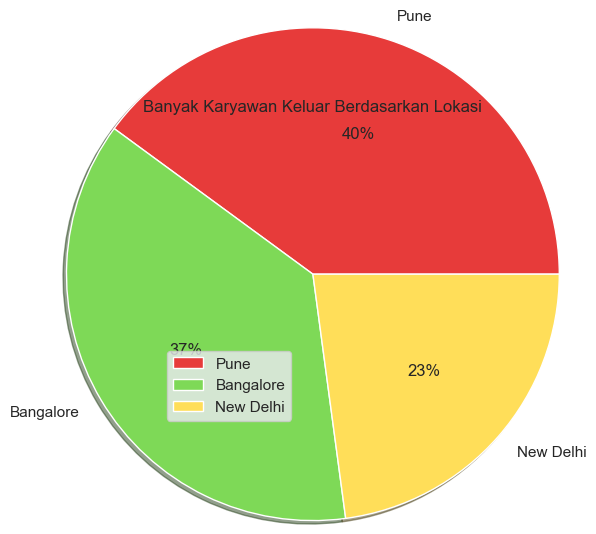

In [130]:
Keluar_Lokasi = Keluar.City.value_counts()
plt.figure(figsize=(6,4))
ax = plt.subplot()
colors=["#E73B3A","#7ED957","#FFDE59"]
ax.pie(Keluar_Lokasi.values,labels = Keluar_Lokasi.index,shadow = True , autopct ='%.0f%%',colors=colors,radius=2)
plt.title("Banyak Karyawan Keluar Berdasarkan Lokasi")
plt.legend(Keluar_Lokasi.index)
plt.show()

In [131]:
Keluar_Lokasi

Pune         639
Bangalore    595
New Delhi    366
Name: City, dtype: int64

##### Dari Pie chart diatas dapat dilihat karyawan yang diprediksi keluar 2 tahun kedepan kebanyakan berasal dari kota Pune

In [132]:
Keluar_Lokasi.to_csv('Karyawan_Keluar_Berdasarkan_Lokasi.csv',index=True)

### Mengetahui banyak karyawan yang bergabung di perusahaan pada tahun berapa

In [133]:
thn_gabung = df_copy['JoiningYear'].value_counts().rename_axis('TahunMasuk').reset_index(name='Jumlah')
thn_gabung

,TahunMasuk,Jumlah
0,2017,1108
1,2015,781
2,2014,699
3,2013,669
4,2016,525
5,2012,504
6,2018,367


Text(-0.18055555555555536, 0.5, 'Jumlah')

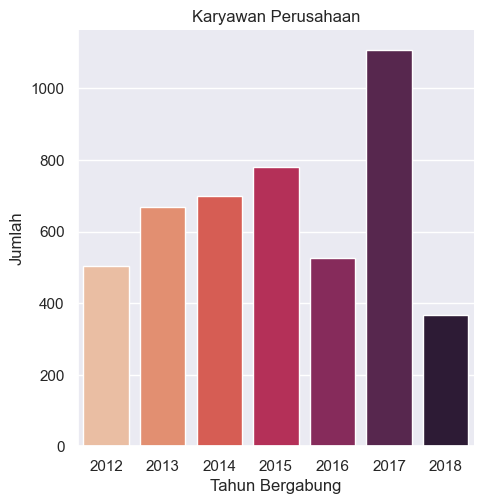

In [134]:
sns.catplot(data= df_copy,kind="count",x='JoiningYear', palette = "rocket_r")
ax = plt.subplot()
plt.title("Karyawan Perusahaan")
ax.set_xlabel("Tahun Bergabung")
ax.set_ylabel("Jumlah")

##### Dari grafik batang diatas menunjukkan banyak karyawan bergabung ke perusahaan pada tahun 2017 

In [135]:
thn_gabung.to_csv('Karyawan_Bergabung-Masuk.csv',index=True)

### Mengetahui banyak pengalaman kerja karyawan pada Domain saat ini

- Grafik Batang


In [136]:
pengalaman = df_copy['ExperienceInCurrentDomain'].value_counts().rename_axis('Pengalaman').reset_index(name='Jumlah')
pengalaman

,Pengalaman,Jumlah
0,2,1087
1,4,931
2,5,919
3,3,786
4,1,558
5,0,355
6,7,9
7,6,8


Text(-0.18055555555555536, 0.5, 'Jumlah')

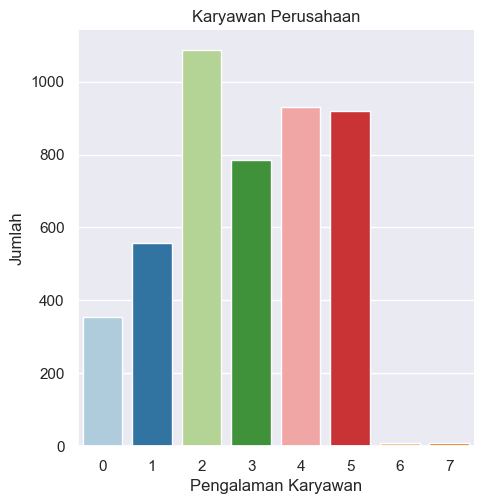

In [137]:
sns.catplot(data= df_copy,kind="count",x='ExperienceInCurrentDomain', palette = "Paired")
ax = plt.subplot()
plt.title("Karyawan Perusahaan")
ax.set_xlabel("Pengalaman Karyawan")
ax.set_ylabel("Jumlah")

##### Dari Grafik di atas, dapat dilihat kebanyakan karyawan memiliki pengalaman 2 tahun dalam domain saat ini

In [138]:
pengalaman.to_csv('Pengalaman_Karyawan.csv',index=True)

### Mengetahui Rasio Karyawan yang Benched dan tidak
- Grafik Pie Chart

In [139]:
benched = df_copy['EverBenched'].value_counts().rename_axis('everbanched').reset_index(name='Jumlah')
benched

,everbanched,Jumlah
0,No,4175
1,Yes,478


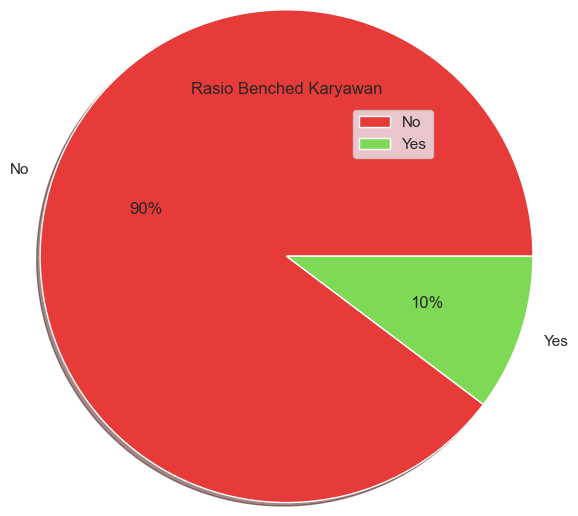

In [140]:
plt.figure(figsize=(6,4))
ax = plt.subplot()
colors=["#E73B3A","#7ED957","#FFDE59"]
plt.pie(benched.Jumlah,labels = benched.everbanched,shadow = True , autopct ='%.0f%%',colors=colors,radius=2)
plt.title("Rasio Benched Karyawan")
plt.legend(benched.everbanched)
plt.show()

##### Dari Pie chart di atas rasio terbanyak adalah karyawan tidak pernah Benched (tidak banyak karyawan yang tidak mengerjakan proyek apapun)


In [141]:
benched.to_csv('Rasio_Benched_Karyawan.csv',index=True)

In [142]:
usia = df_copy['Age'].value_counts().rename_axis('Usia').reset_index(name='Jumlah')
usia

,Usia,Jumlah
0,26,645
1,28,630
2,27,625
3,25,418
4,24,385
5,29,230
6,30,220
7,37,141
8,36,139
9,34,136


### Mengetahui Rata-rata Usia Karyawan yang Keluar dari Perusahaan
- Grafik Box Plot

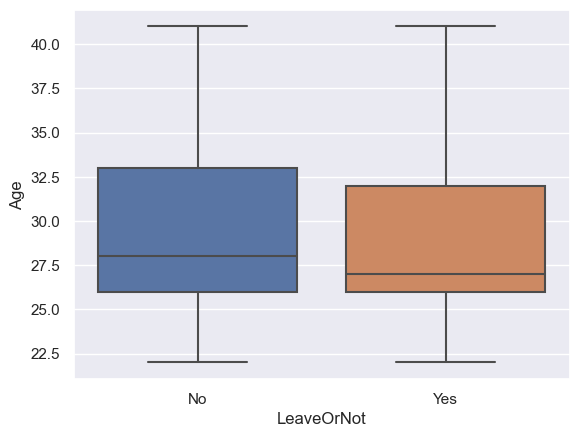

In [143]:
sns.boxplot(x=df_copy['LeaveOrNot'],y=df['Age'])
plt.show()

##### Dari Box Plot di atas, dapat dilihat Rata- rata usia karyawan yang keluar 2 tahun kedepan adalah pada usia di atas 25 tahun dan di bawah 32 tahun


In [144]:
usia.to_csv('Usia_Karyawan.csv',index=True)

### Informasi yang dapat disimpulkan :
1. Kebanyakan Pendidikan karyawan yang ada di perusahaan adalah Bachelors;
2. Karyawan yang bekerja di perusahaan lebih banyak bergender laki-laki;
3. Prediksi karyawan yang meninggalkan perusahaan 2 tahun kedepan kebanyakan dari karyawan perempuan;
4. Dari Korelasi data, Faktor PaymenTier dan JoiningYear paling berpengaruh terhadapat keluarnya karyawan 2 tahun kedepan;
5. Karyawan yang meninggalkan perusahaan lebih banyak yang tingkat bayarannya rendah dan tahun bergabungnya pada tahun 2018;
6. Bangalore adalah kota terbanyak tempat karyawan perusahaan bekerja; 
7. karyawan banyak bergabung ke perusahaan pada tahun 2017;
8. Karyawan yang diprediksi keluar 2 tahun kedepan kebanyakan berasal dari kota Pune;
9. Kebanyakan karyawan memiliki pengalaman 2 tahun dalam domain saat ini;
10. Tidak banyak karyawan yang Benched (tidak mengerjakan proyek) di dalam perusahaan;
11. Rata- rata usia karyawan yang keluar 2 tahun kedepan adalah pada usia di atas 25 tahun dan di bawah 32 tahun.

